# Table of Contents
<a id="table-of-contents"></a>

0. [Import Libraries](#imports)
1. [Import Data](#import_data)
2. [Data Exploration](#data_exploration) 
3. [Data Cleaning](#data_cleaning) 
4. [Data Preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
    5.1. [Train-test split](#train_test_split)<br>
    5.2. [Fit a model to the data](#fit_model)<br> 
    5.3. [Model evaluation](#model_evaluation)<br> 
    5.4. [Fix problems](#fix_problems) 
6. [Feature engineering](#feature_engineering) 
7. [Model training](#model_training)<br> 
    7.1. [Decision Tree](#decision_tree)<br> 
    7.2. [Random Forest](#random_forest) - 
      [Overfit](#overfit) - 
      [Underfit](#underfit)<br> 
    7.3. [Gradient boosting](#gradient_boosting)<br> 
    7.4. [Comparing algorithm performances](#comparing_algorithm_performances) 
8. [Tuning](#tuning)<br> 
    8.1 [Find best parameters](#find_best_parameters)<br> 
    Bonus: [Classification](#classification) 

# 0. Import Libraries
<a id="imports"></a>
<br>
[Back to the Top](#table-of-contents)

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

# 1. Import Data
<a id="import_data"></a>
<br>
[Back to the Top](#table-of-contents)

In [4]:
#import data into jupyter notebook 
taxi_jan_2024 = pd.read_parquet("data/yellow_tripdata_2024-01.parquet") 
taxi_df = pd.concat([taxi_jan_2024])

In [5]:
#print the shape to know the number of rows and columns of the dataset and the preview of the data
print(taxi_df.shape)
taxi_df.head()

(2964624, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [6]:
#print the end of the dataset 
taxi_df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN
2964623,1,2024-01-31 23:58:25,2024-02-01 00:13:30,NaN,8.10,NaN,None,138,75,0,32.40,7.75,0.5,7.29,6.94,1.0,55.88,NaN,NaN


# 2. Data Exploration 
<a id="data_exploration"></a>
<br>
[Back to the Top](#table-of-contents)

In [7]:
#Display the columns of the dataset
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [8]:
#Drop some olumns that wont be relevant to the predictive algorithm 
taxi_data = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 
       'PULocationID', 'DOLocationID', 'payment_type', 
       'total_amount']]

In [9]:
#print the preview of the data
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


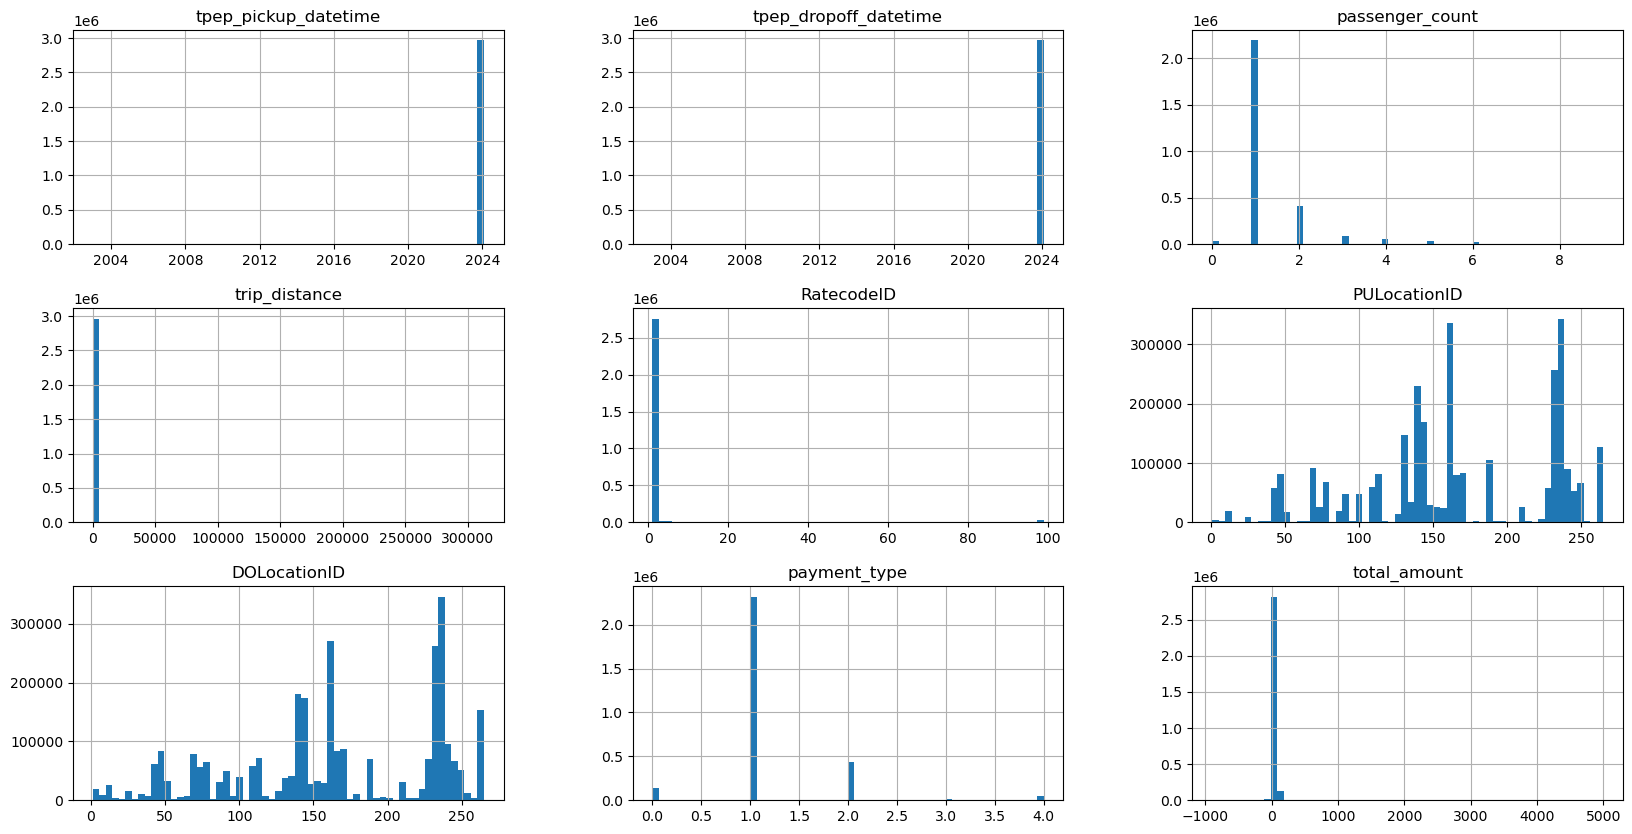

In [10]:
#plotting help explore the data 
taxi_data.hist(figsize=(20, 10), bins =60)
plt.show()

* tpep_pickup_date = It shows that all the data was collected in the 2024 so that shows that data is accurate 
* tpep_dropoff_datetime = It shows that all the data was collected in the 2024 so that shows that data is accurate
* passenger_count = The graph shows that most of the passengers that pick the taxi was between 1 and 4 and there are some few outliers like *0, 8 and 10*, which could be a human error because it is entered manually by the driver 
* trip_distance = The elapsed trip distance in miles reported by the taximeter, from the graph most of the data points are within 0 and 1000miles and some few outliers which are greater that 10000miles 
* RatecodeID = The final rate code in effect at the end of the trip, from the graph it shows that most commuters paid a regular fare charged by the taxi. 
* PULocationID =  TLC Taxi Zone in which the taximeter was engaged
* DOLocationID =  TLC Taxi Zone in which the taximeter was disengaged
* payment_type = A numeric code signifying how the passenger paid for the trip(1= Credit card, 2= Cash, 3= No charge 4= Dispute, 5= Unknown, 6= Voided trip), from the graph we can tell that most of the mode of payment was credit card and cash, with an outlier 0 - which would have to be investigated
* total_amount = The total amount charged to passengers. Does not include cash tips, the graph shows that most passengers paid between 1-100USD, there are outliers like USD5000 - which would have to investigated. 


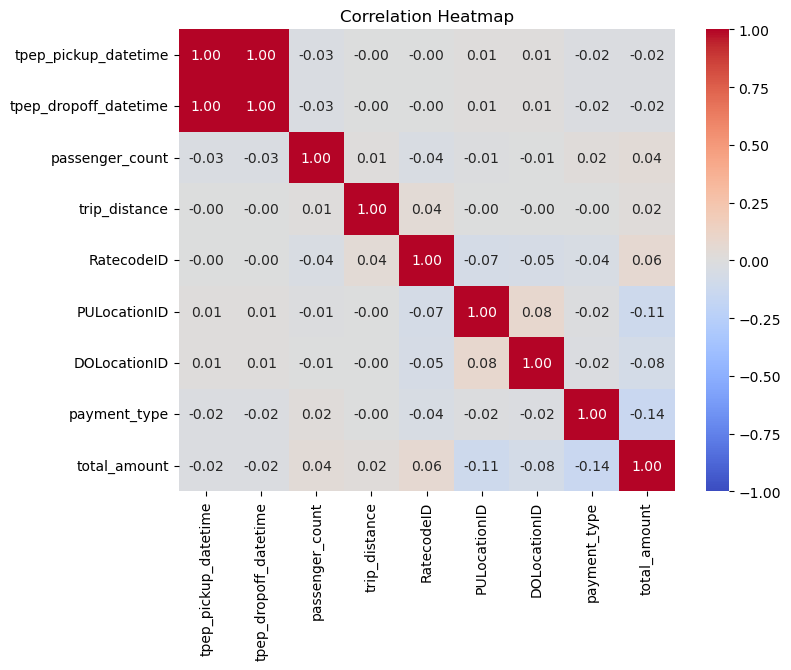

In [11]:
corr_matrix = taxi_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int32         
 6   DOLocationID           int32         
 7   payment_type           int64         
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(4), int32(2), int64(1)
memory usage: 180.9 MB


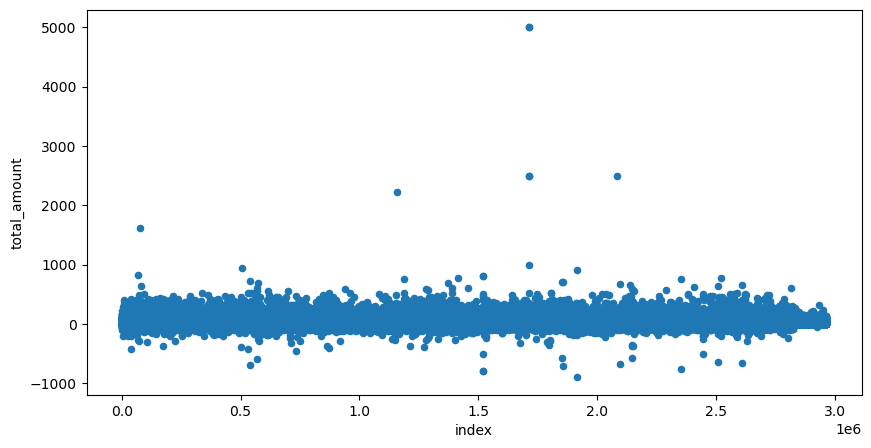

In [13]:
#Plot a scatterplot to visualize the distribution of the total amount paid by commuters 
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x= 'index', figsize=(10,5))
plt.show()

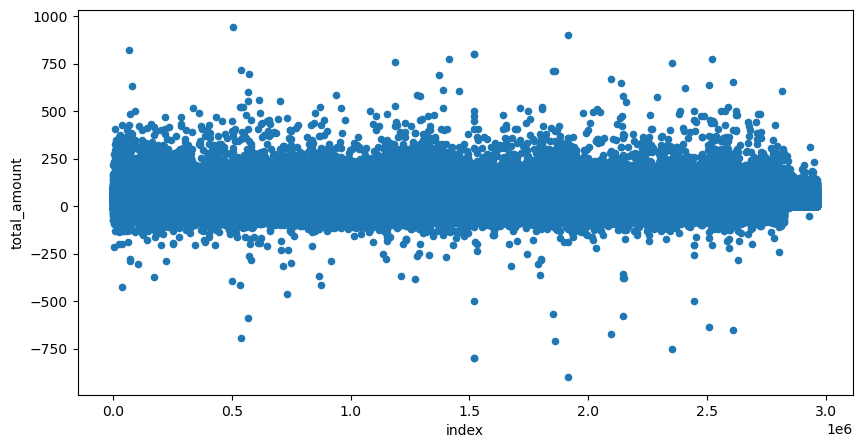

In [14]:
taxi_data[taxi_data['total_amount']<1000].reset_index()\
.plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

#### Two things to deal with negative values and high values 

(35504, 9)


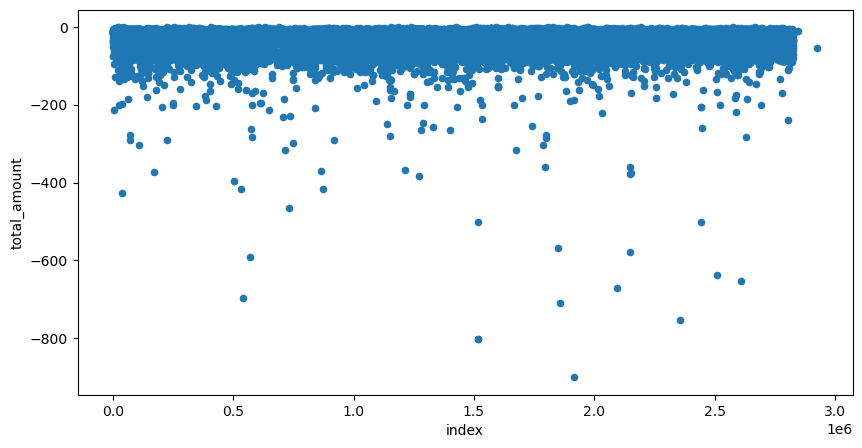

In [15]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index()\
.plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

In [16]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,90,225,4,-52.80


In [17]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

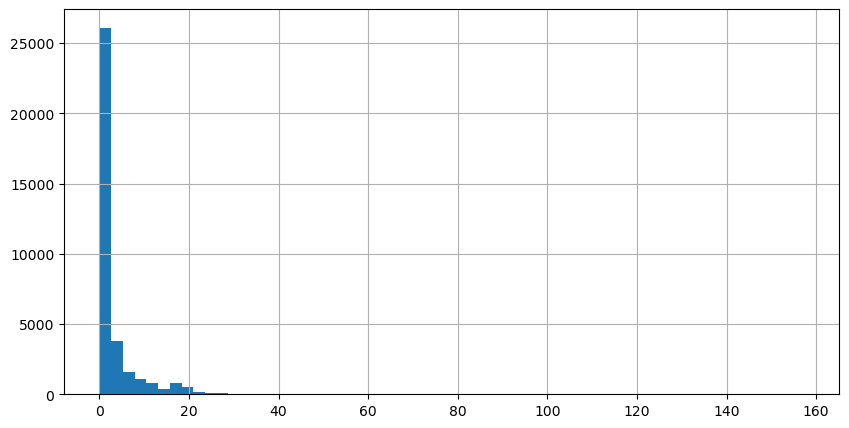

In [18]:
taxi_data[taxi_data['total_amount']<0]\
['trip_distance'].hist(bins=60, figsize=(10,5))
plt.show()

In [19]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(416, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1.0,0.2,1.0,239,143,4,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1.0,0.0,5.0,239,264,2,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1.0,0.0,99.0,42,216,1,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1.0,0.0,1.0,264,264,2,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1.0,0.0,1.0,193,193,2,0.0


In [20]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    129
4    128
3     83
2     65
0     11
Name: count, dtype: int64

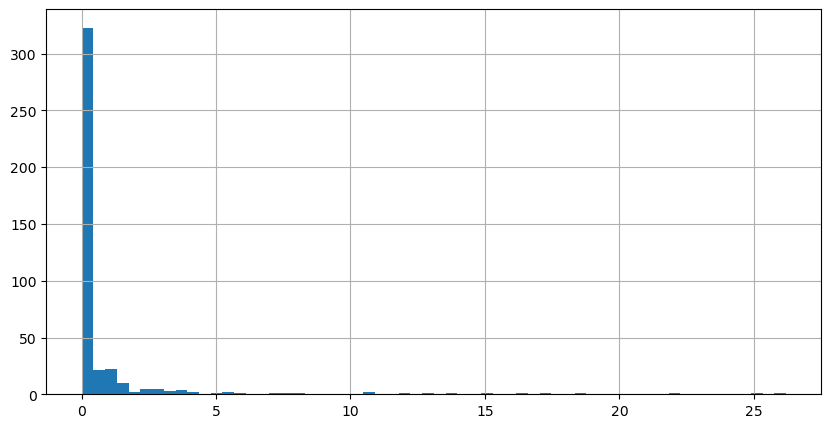

In [21]:
taxi_data[taxi_data['total_amount']==0]['trip_distance']\
.hist(bins=60, figsize=(10, 5))
plt.show()

In [22]:
#taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

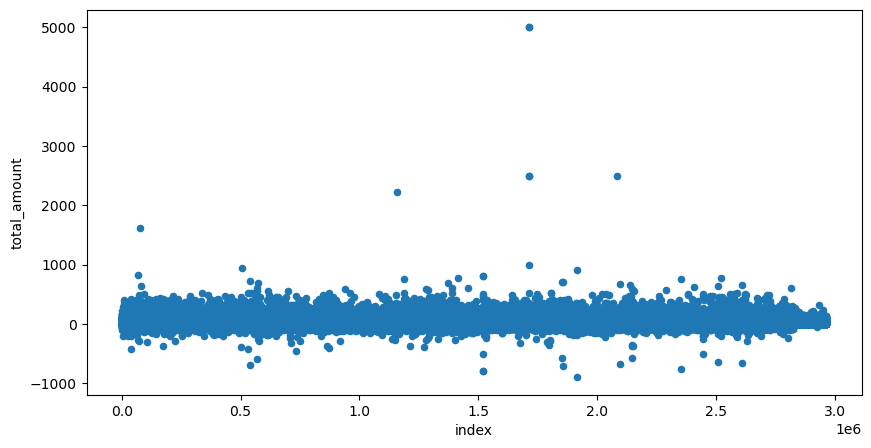

In [23]:
taxi_data.reset_index()\
.plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
plt.show()

In [24]:
#taxi_data where total amount is greater tha 200 
taxi_data[taxi_data['total_amount']>200].shape

(2005, 9)

In [25]:
#mean total_amount of the taxi_data
taxi_data['total_amount'].mean()

26.801504770925415

In [26]:
#median total_amount of the taxi_data 
taxi_data['total_amount'].median()

20.1

# 3. Data Cleaning 
<a id="data_cleaning"></a>
<br>
[Back to the Top](#table-of-contents)

In [27]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)\
                               & (taxi_data['total_amount'])<200]

In [28]:
#check for the number of rows and columns in the taxi_data_filtered dataset 
print(taxi_data_filtered.shape)

(2964624, 9)


In [29]:
#check for missing values
taxi_data_filtered.isna().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

In [30]:
#Explore the empty values to find if there are some correlations why there are empty values 
taxi_data_filtered[(taxi_data_filtered['passenger_count'].isna())\
         &(taxi_data_filtered['RatecodeID'].isna())]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
2824462,2024-01-01 00:34:19,2024-01-01 00:51:22,NaN,2.04,NaN,143,141,0,16.72
2824463,2024-01-01 00:14:31,2024-01-01 00:19:29,NaN,1.60,NaN,236,238,0,17.16
2824464,2024-01-01 00:35:11,2024-01-01 01:13:40,NaN,0.00,NaN,142,79,0,25.01
2824465,2024-01-01 00:33:37,2024-01-01 00:50:34,NaN,0.00,NaN,237,4,0,21.79
2824466,2024-01-01 00:49:04,2024-01-01 01:01:16,NaN,0.00,NaN,244,50,0,38.65
...,...,...,...,...,...,...,...,...,...
2964619,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,107,263,0,21.77
2964620,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,114,236,0,25.74
2964621,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,211,25,0,23.97
2964622,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,107,13,0,33.46


In [31]:
#drop empty values 
taxi_data_filtered.dropna(subset=['passenger_count', 'RatecodeID'], inplace=True)

In [32]:
print(taxi_data_filtered.shape)
taxi_data_filtered.isna().sum()

(2824462, 9)


tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [33]:
#check for data range constraints 
taxi_data_filtered['payment_type'].value_counts()

payment_type
1    2319046
2     439191
4      46628
3      19597
Name: count, dtype: int64

* From the value counts of payment type we can tell that the payment type column is accurate

In [34]:
#check for data range constraints 
taxi_data_filtered['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

* From the value counts of RatecodeID, there is an outlier of 99.0 that is not suppose to be in the data range and would have to be dropped 

In [35]:
#Drop the rows where ratecodeid == 99.0 
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['RatecodeID'] != 99.0]
print(taxi_data_filtered.shape)

(2795799, 9)


In [36]:
taxi_data_filtered['total_amount'].value_counts()

total_amount
 16.80     45217
 12.60     43108
 21.00     35361
 15.12     26474
 15.96     26222
           ...  
-79.84         1
 161.18        1
 137.54        1
 253.66        1
-52.63         1
Name: count, Length: 18328, dtype: int64

In [37]:
taxi_data_filtered.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [38]:
taxi_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2795799 entries, 0 to 2824461
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   RatecodeID             float64       
 5   PULocationID           int32         
 6   DOLocationID           int32         
 7   payment_type           int64         
 8   total_amount           float64       
dtypes: datetime64[ns](2), float64(4), int32(2), int64(1)
memory usage: 192.0 MB


In [39]:
taxi_data_filtered.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,2795799,2795799,2.795799e+06,2.795799e+06,2.795799e+06,2.795799e+06,2.795799e+06,2.795799e+06,2.795799e+06
mean,2024-01-17 01:05:09.516053504,2024-01-17 01:20:26.302648832,1.342754e+00,3.207189e+00,1.075610e+00,1.666517e+02,1.658680e+02,1.221134e+00,2.674900e+01
min,2002-12-31 22:59:39,2002-12-31 23:05:41,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02
25%,2024-01-09 15:35:16,2024-01-09 15:51:37,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.160000e+02,1.000000e+00,1.512000e+01
50%,2024-01-17 10:35:04,2024-01-17 10:53:07,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.980000e+01
75%,2024-01-24 18:45:32,2024-01-24 19:00:21,1.000000e+00,3.030000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.820000e+01
max,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,1.540032e+04,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.225300e+03
std,NaN,NaN,8.539132e-01,1.214368e+01,4.154563e-01,6.293934e+01,6.905405e+01,5.350827e-01,2.323823e+01


In [40]:
taxi_data_filtered[taxi_data_filtered['tpep_pickup_datetime'] == '2002-12-31 22:59:39']

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
53119,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,170,170,3,-10.5
53120,2002-12-31 22:59:39,2002-12-31 23:05:41,1.0,0.63,1.0,170,170,3,10.5


* While prepping the data, there was an outlier found that is year 2002 which would have be investigated and cleaned 

In [41]:
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['tpep_pickup_datetime'] \
                                        != '2002-12-31 22:59:39']

In [42]:
taxi_data_filtered.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,2795797,2795797,2.795797e+06,2.795797e+06,2.795797e+06,2.795797e+06,2.795797e+06,2.795797e+06,2.795797e+06
mean,2024-01-17 01:13:04.570522624,2024-01-17 01:28:21.357515264,1.342754e+00,3.207191e+00,1.075610e+00,1.666517e+02,1.658680e+02,1.221133e+00,2.674902e+01
min,2009-01-01 00:24:09,2009-01-01 01:13:00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02
25%,2024-01-09 15:35:16,2024-01-09 15:51:38,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.160000e+02,1.000000e+00,1.512000e+01
50%,2024-01-17 10:35:04,2024-01-17 10:53:08,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.980000e+01
75%,2024-01-24 18:45:32,2024-01-24 19:00:21,1.000000e+00,3.030000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.820000e+01
max,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,1.540032e+04,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.225300e+03
std,NaN,NaN,8.539134e-01,1.214368e+01,4.154564e-01,6.293937e+01,6.905407e+01,5.350808e-01,2.323822e+01


In [43]:
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['tpep_pickup_datetime'] \
                                        != '2009-01-01 23:30:39']

In [44]:
taxi_data_filtered.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,2795796,2795796,2.795796e+06,2.795796e+06,2.795796e+06,2.795796e+06,2.795796e+06,2.795796e+06,2.795796e+06
mean,2024-01-17 01:15:54.325878528,2024-01-17 01:31:11.112533760,1.342754e+00,3.207189e+00,1.075610e+00,1.666516e+02,1.658680e+02,1.221132e+00,2.674902e+01
min,2009-01-01 00:24:09,2009-01-01 01:13:00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02
25%,2024-01-09 15:35:17.500000,2024-01-09 15:51:38,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.160000e+02,1.000000e+00,1.512000e+01
50%,2024-01-17 10:35:04,2024-01-17 10:53:08,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.980000e+01
75%,2024-01-24 18:45:32,2024-01-24 19:00:21.249999872,1.000000e+00,3.030000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.820000e+01
max,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,1.540032e+04,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.225300e+03
std,NaN,NaN,8.539135e-01,1.214368e+01,4.154565e-01,6.293936e+01,6.905406e+01,5.350807e-01,2.323822e+01


In [45]:
# Convert 'datetime_column' to datetime format
taxi_data_filtered['tpep_pickup_datetime'] = pd.to_datetime(taxi_data_filtered['tpep_pickup_datetime'])

# Extract the year from the datetime column
taxi_data_filtered['year'] = taxi_data_filtered['tpep_pickup_datetime'].dt.year

# Filter out rows where the year is not 2024
taxi_data_filtered_not_2024 = taxi_data_filtered[taxi_data_filtered['year'] != 2024]
taxi_data_filtered_not_2024

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,year
256,2023-12-31 23:56:46,2024-01-01 00:12:06,2.0,2.38,1.0,236,142,1,21.60,2023
369,2023-12-31 23:39:17,2023-12-31 23:42:00,2.0,0.47,1.0,90,68,1,10.10,2023
753,2023-12-31 23:41:02,2023-12-31 23:48:03,1.0,0.40,1.0,246,246,2,12.20,2023
2210,2023-12-31 23:57:17,2024-01-01 00:01:50,1.0,0.53,1.0,144,211,1,12.96,2023
2615,2023-12-31 23:56:45,2024-01-01 00:00:28,1.0,0.97,1.0,163,237,1,13.50,2023
2985,2023-12-31 23:49:12,2024-01-01 00:04:32,1.0,3.14,1.0,234,237,1,28.60,2023
3176,2023-12-31 23:47:28,2023-12-31 23:57:07,2.0,1.44,1.0,68,137,1,18.84,2023
4137,2023-12-31 23:58:35,2024-01-01 00:13:06,6.0,8.39,1.0,138,217,2,42.35,2023
4142,2023-12-31 23:58:37,2024-01-01 00:08:37,2.0,0.59,1.0,161,170,1,18.75,2023
8628,2023-12-31 23:54:27,2024-01-01 00:13:12,1.0,7.70,1.0,229,244,1,45.72,2023


In [46]:
taxi_data_filtered = taxi_data_filtered[taxi_data_filtered['tpep_pickup_datetime'] \
                                        != '2009-01-01 00:24:09']


In [47]:
taxi_data_filtered.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,year
count,2795795,2795795,2.795795e+06,2.795795e+06,2.795795e+06,2.795795e+06,2.795795e+06,2.795795e+06,2.795795e+06,2.795795e+06
mean,2024-01-17 01:18:44.111112448,2024-01-17 01:34:00.897046016,1.342754e+00,3.207186e+00,1.075610e+00,1.666516e+02,1.658680e+02,1.221132e+00,2.674900e+01,2.024000e+03
min,2009-01-01 23:58:40,2009-01-02 00:01:40,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02,2.009000e+03
25%,2024-01-09 15:35:18,2024-01-09 15:51:38,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.160000e+02,1.000000e+00,1.512000e+01,2.024000e+03
50%,2024-01-17 10:35:04,2024-01-17 10:53:08,1.000000e+00,1.650000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.980000e+01,2.024000e+03
75%,2024-01-24 18:45:32,2024-01-24 19:00:21.500000,1.000000e+00,3.030000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.820000e+01,2.024000e+03
max,2024-02-01 00:01:15,2024-02-02 13:56:52,9.000000e+00,1.540032e+04,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.225300e+03,2.024000e+03
std,NaN,NaN,8.539136e-01,1.214368e+01,4.154566e-01,6.293937e+01,6.905405e+01,5.350806e-01,2.323822e+01,9.168138e-03


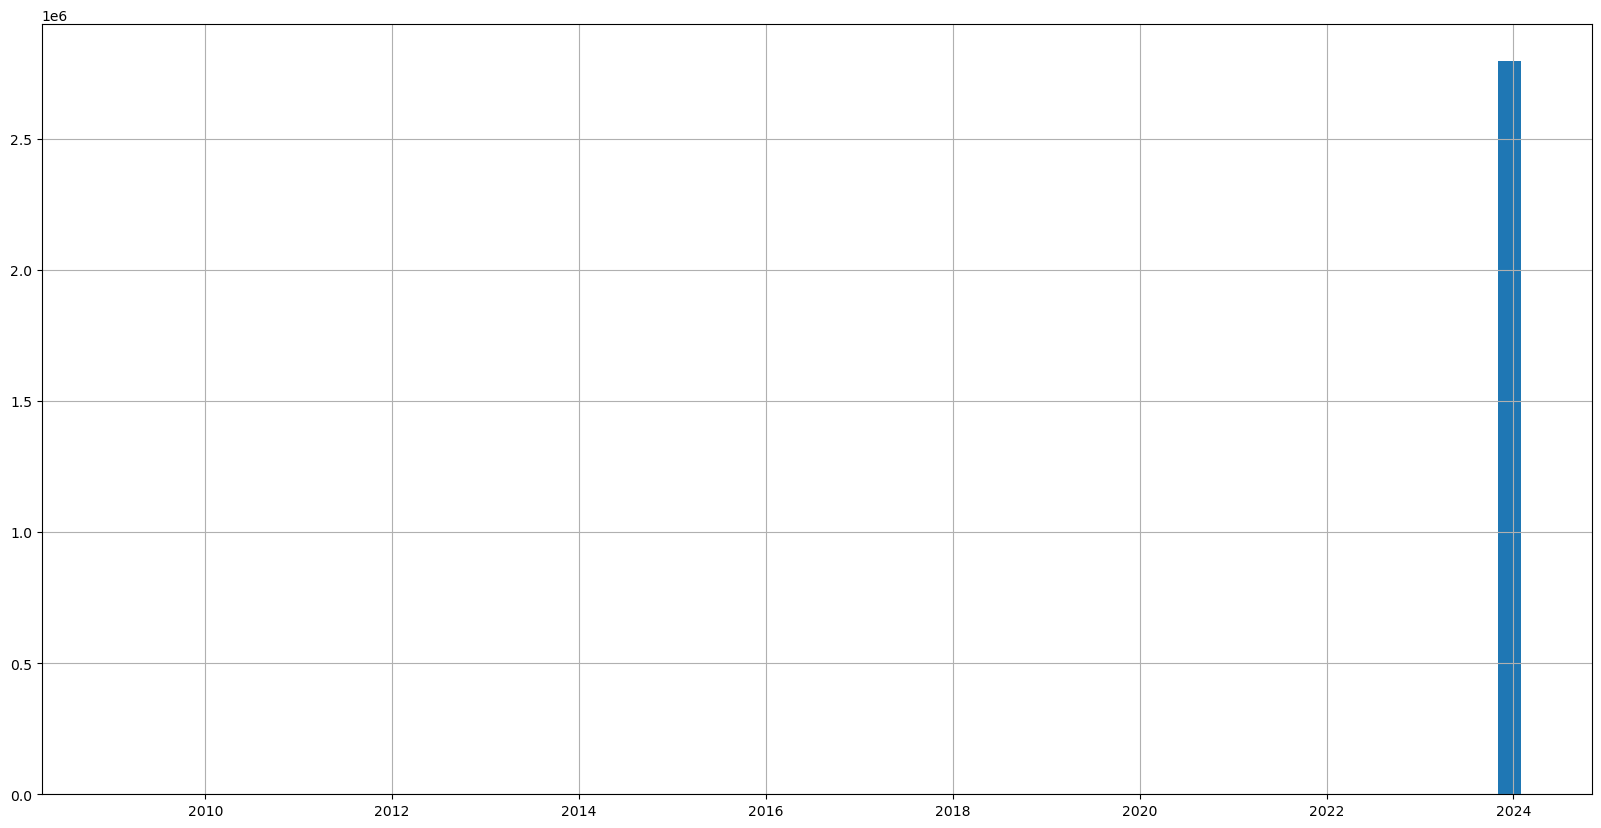

In [48]:
taxi_data_filtered['tpep_pickup_datetime'].hist(figsize=(20, 10), bins=60)
plt.show()

In [49]:
np.min(taxi_data_filtered['tpep_pickup_datetime'])

Timestamp('2009-01-01 23:58:40')

In [50]:
taxi_data_filtered['passenger_count'].value_counts()

passenger_count
1.0    2160151
2.0     405063
3.0      91258
4.0      51973
5.0      33506
0.0      31431
6.0      22353
8.0         51
7.0          8
9.0          1
Name: count, dtype: int64

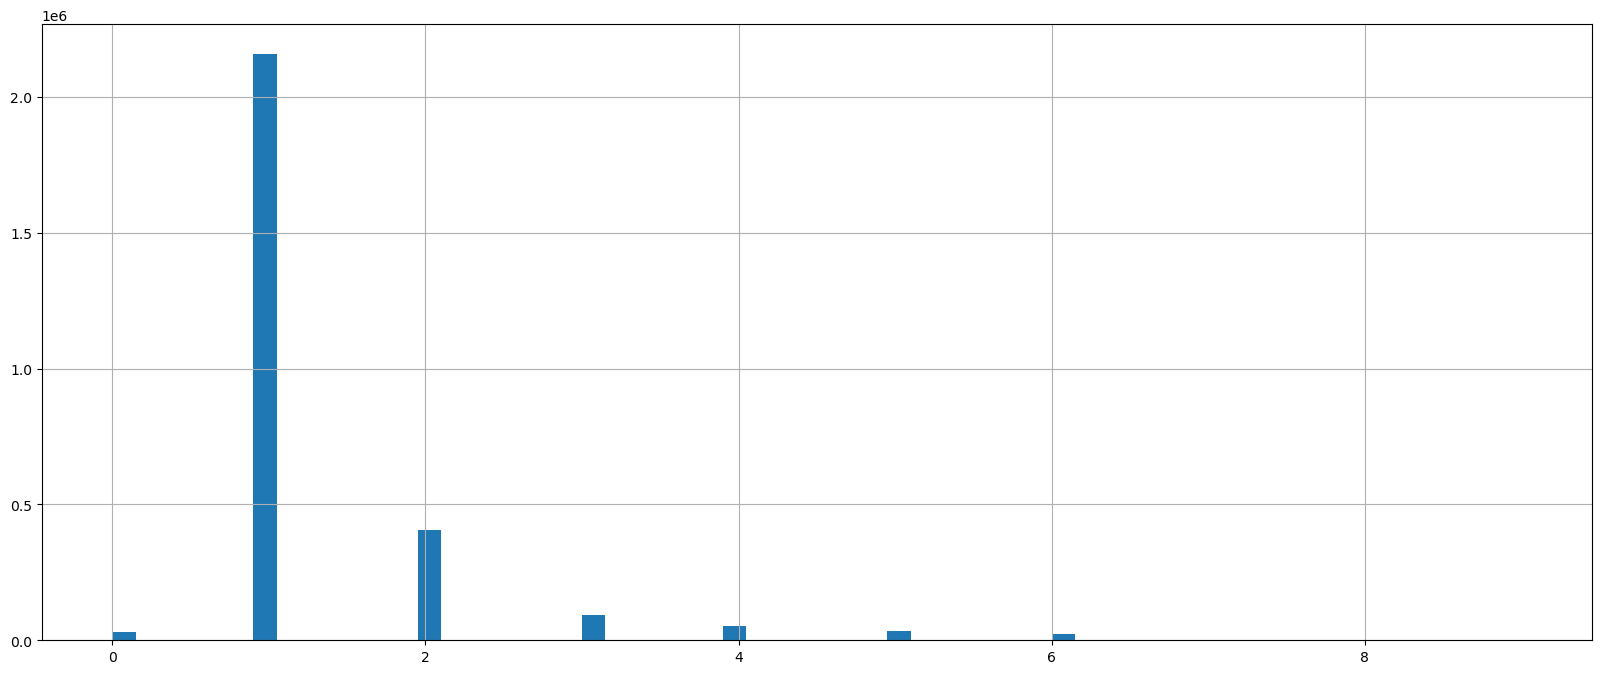

In [51]:
taxi_data_filtered['passenger_count'].hist(figsize=(20, 8), bins=60)
plt.show()

In [52]:
mask = ~taxi_data_filtered['passenger_count'].isin([5.0, 6.0, 7.0, 8.0, 9.0])

taxi_data_filtered = taxi_data_filtered[mask]
taxi_data_filtered.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,year
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024


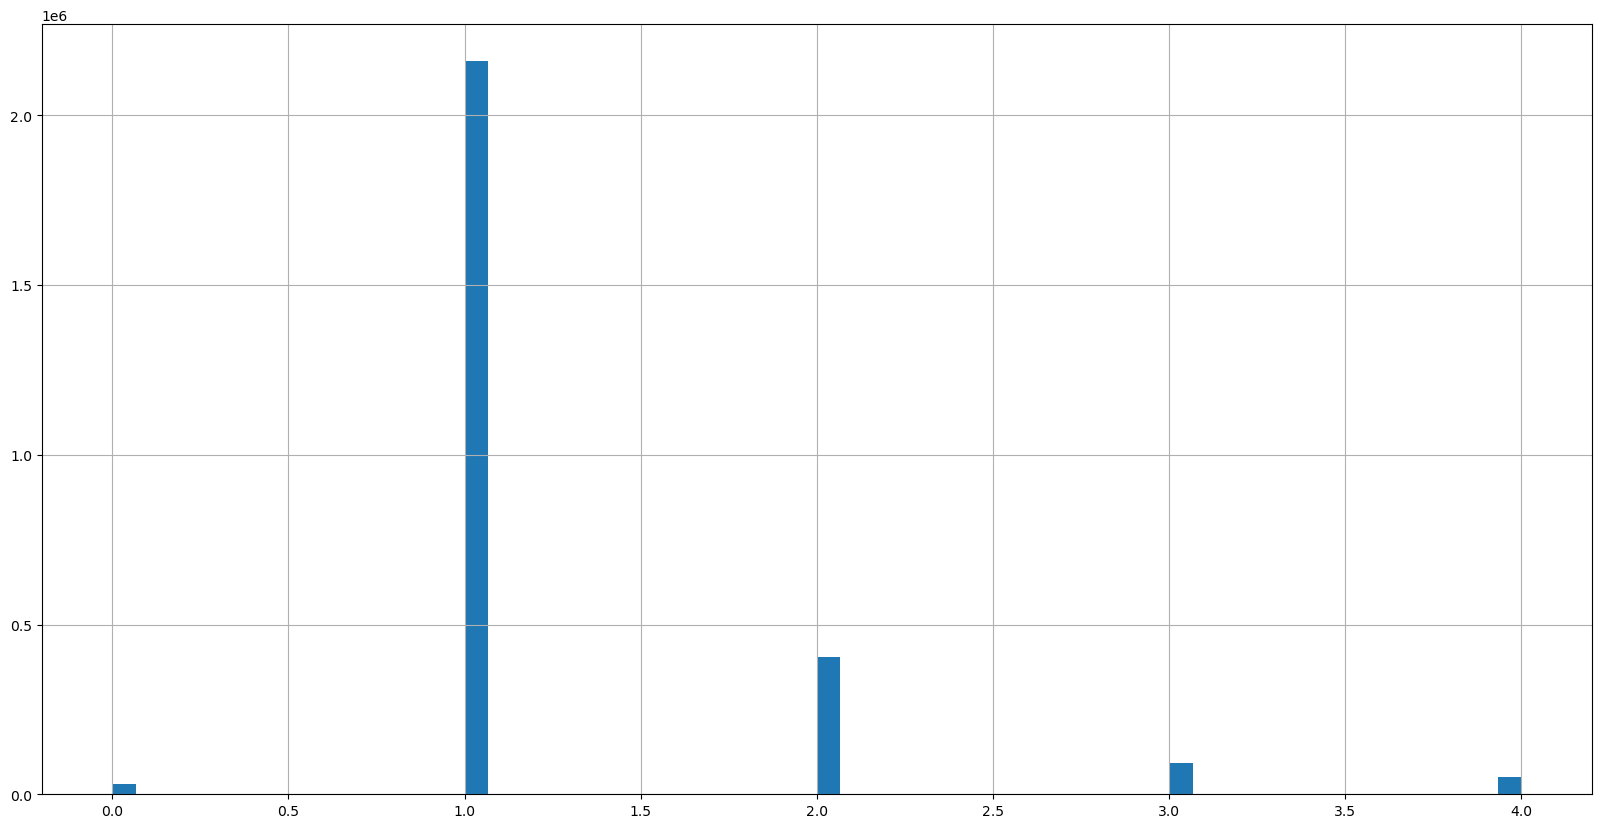

In [53]:
taxi_data_filtered['passenger_count'].hist(figsize=(20, 10), bins=60)
plt.show()

In [54]:
taxi_data_filtered.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'year'],
      dtype='object')

In [55]:
taxi_data_filtered.drop(columns=['year'], inplace=True)

In [56]:
taxi_data_filtered.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount'],
      dtype='object')

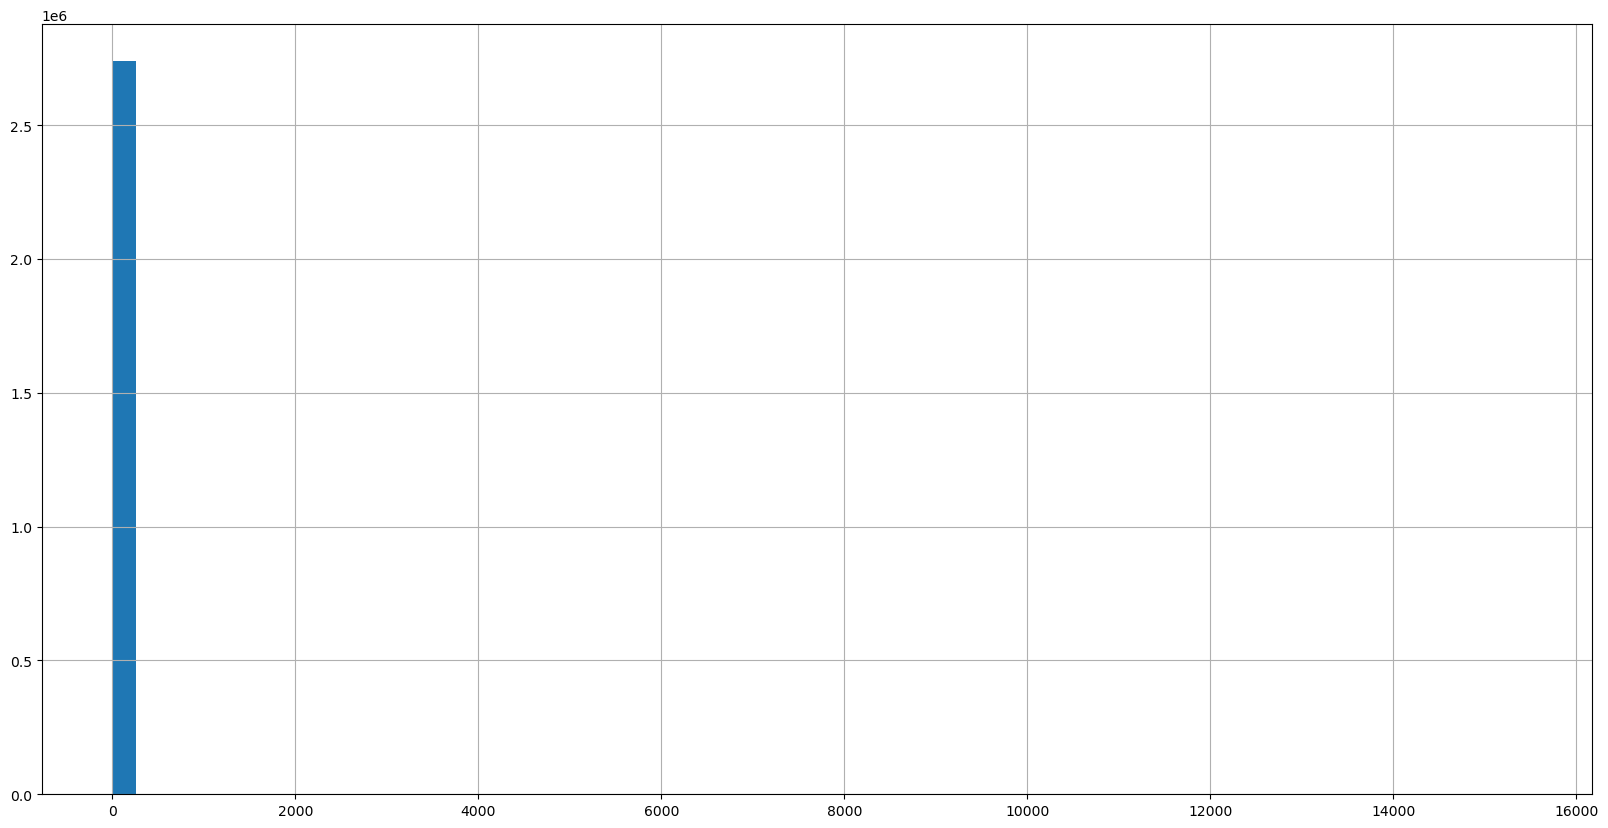

In [57]:
taxi_data_filtered['trip_distance'].hist(figsize=(20, 10), bins=60)
plt.show()

In [58]:
mask = taxi_data_filtered['trip_distance'] <= 300
taxi_data_filtered = taxi_data_filtered[mask]
taxi_data_filtered.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


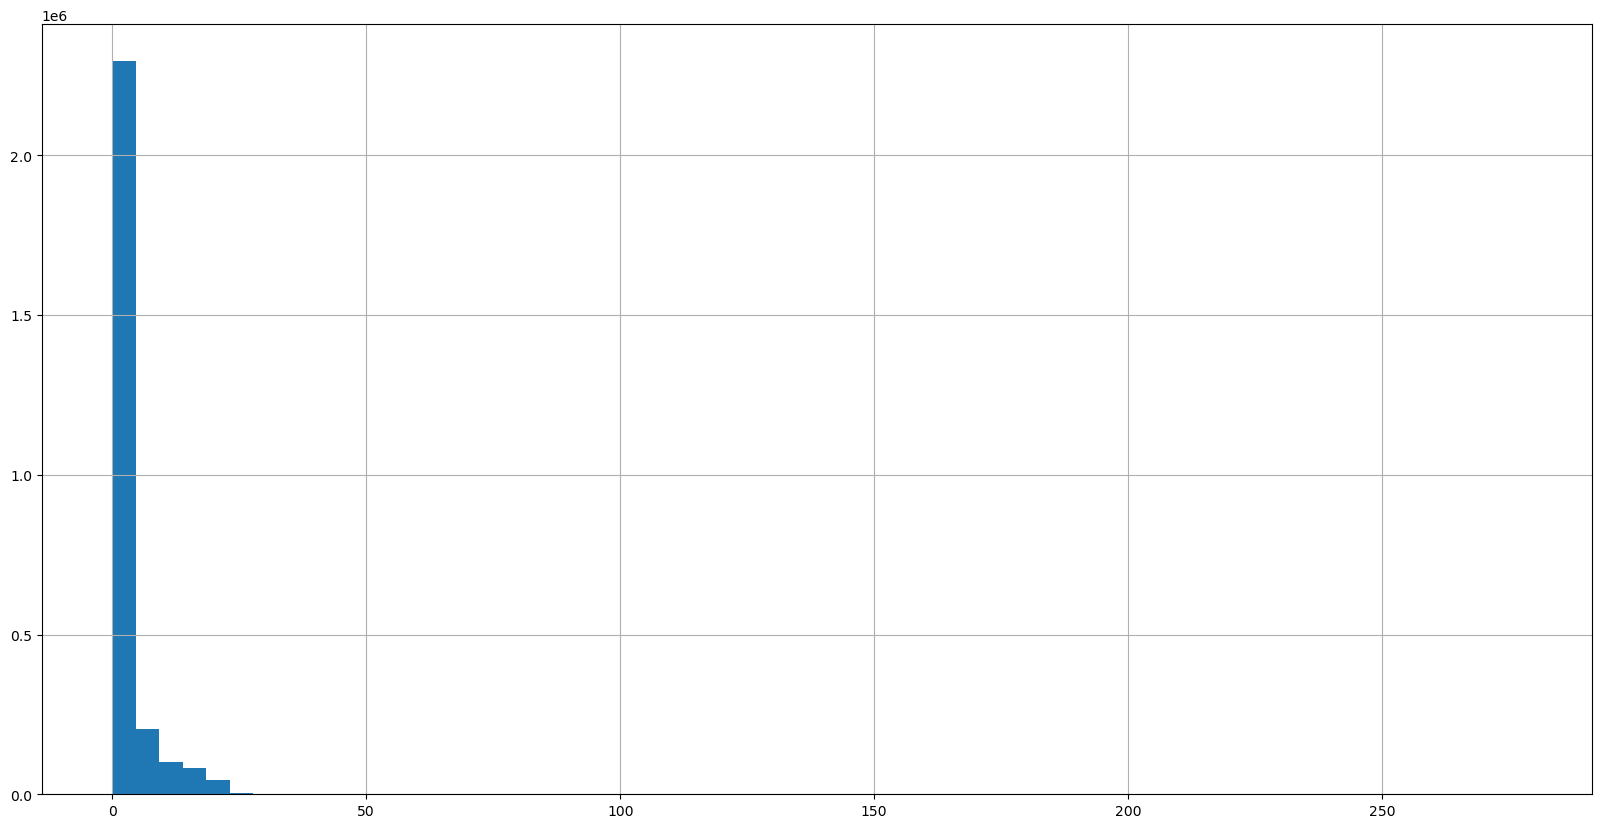

In [59]:
taxi_data_filtered['trip_distance'].hist(figsize=(20, 10), bins=60)
plt.show()

In [60]:
taxi_data_filtered.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount'],
      dtype='object')

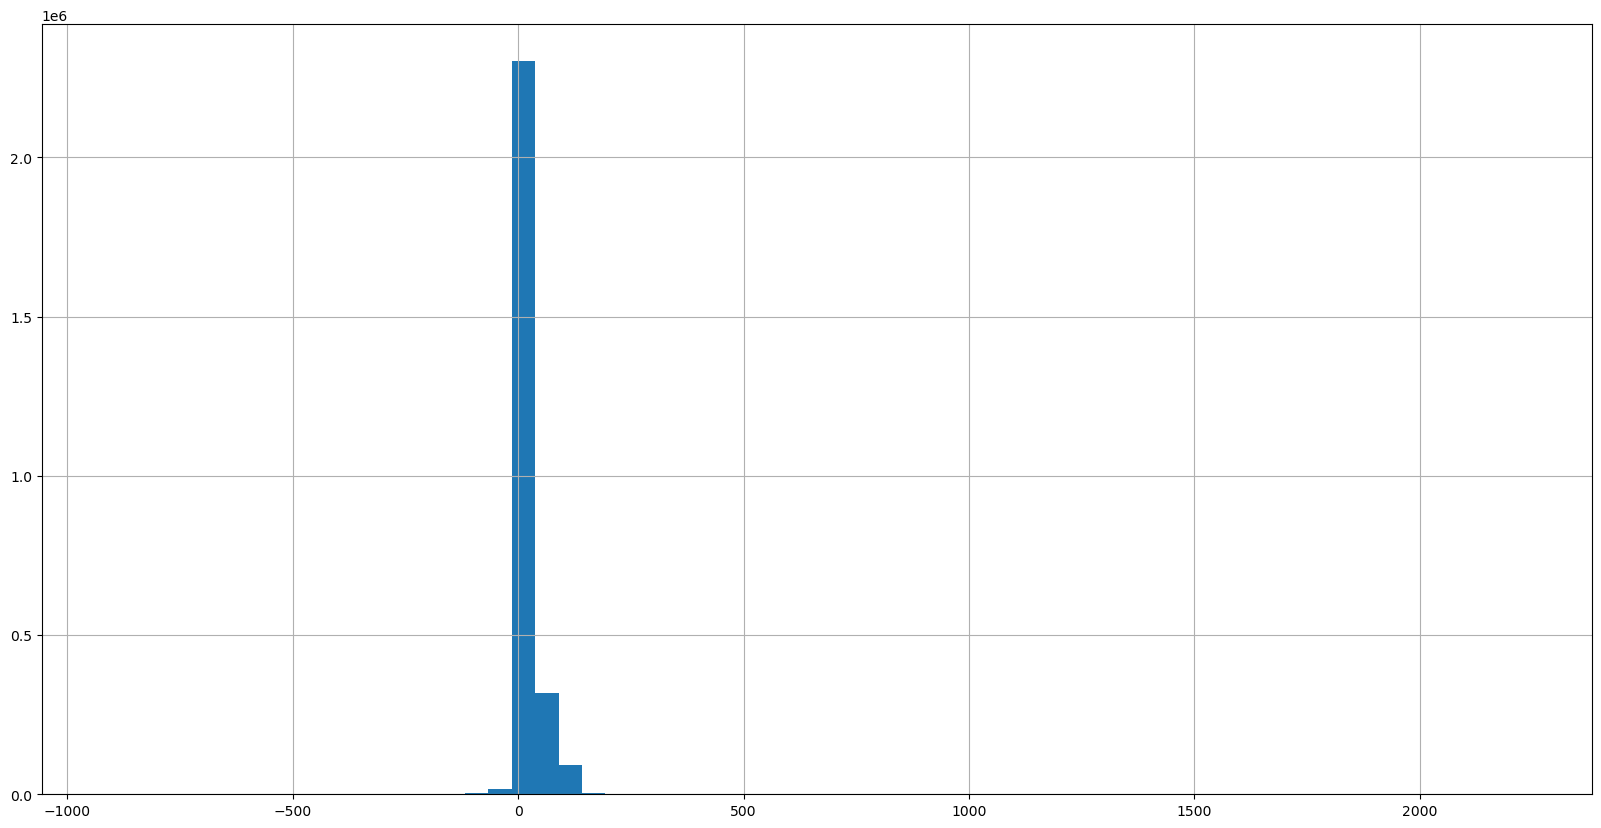

In [61]:
taxi_data_filtered['total_amount'].hist(figsize=(20,10), bins=60)
plt.show()

In [62]:
taxi_data_filtered['total_amount'].value_counts()

total_amount
 16.80     44254
 12.60     42170
 21.00     34606
 15.12     25761
 15.96     25487
           ...  
 106.09        1
 20.67         1
 259.98        1
-33.14         1
-52.63         1
Name: count, Length: 18251, dtype: int64

In [63]:
# Create a boolean mask to identify rows with non-negative total amounts
mask = taxi_data_filtered['total_amount'] >= 0
# Filter the DataFrame to include only rows with non-negative total amounts
taxi_data_filtered = taxi_data_filtered[mask]

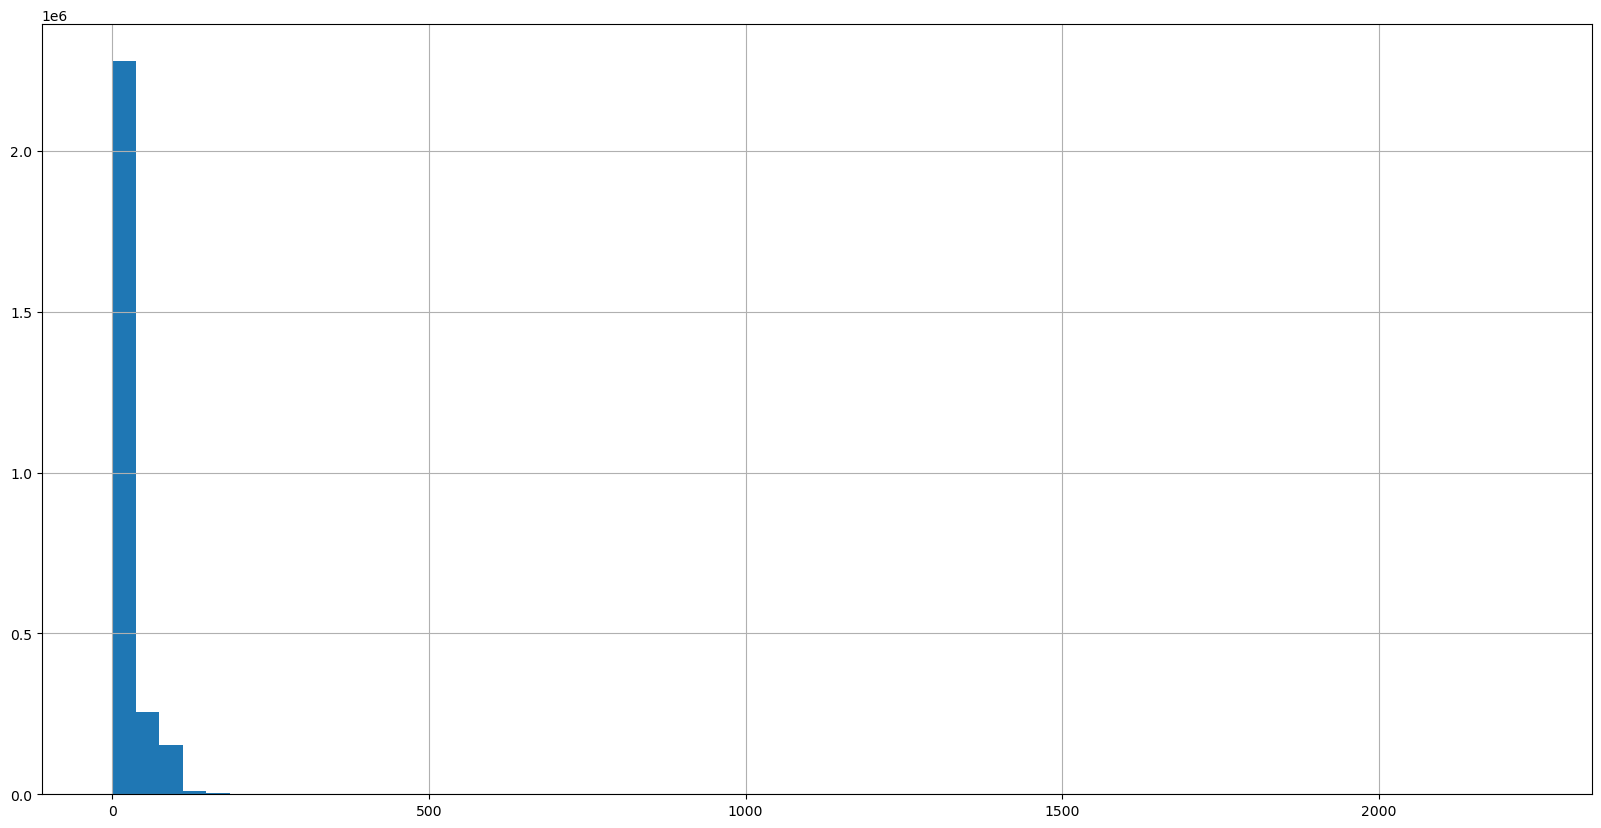

In [64]:
taxi_data_filtered['total_amount'].hist(figsize=(20,10), bins=60)
plt.show()

In [65]:
taxi_data_filtered.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10




# 4. Data Preparation  
<a id="data_preparation"></a>
<br>
[Back to the Top](#table-of-contents)

In [66]:
taxi_data_prepared = taxi_data_filtered.copy()
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [67]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

<b> Data type conversion </b>
* PULocationID - convert to string
* DOLocationID - convert to string
* RatecodeID - convert to string 
* payment_type - convert to string 

We are converting it to a category because we dont want the model to treat it as a number \
higher than another but as a category of values
* passenger_count - convert to int 


In [68]:
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

C:\Users\iwiss\AppData\Local\Temp\ipykernel_27940\2494067482.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
C:\Users\iwiss\AppData\Local\Temp\ipykernel_27940\2494067482.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['79' '236' '79' ... '249' '163' '263']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
C:\Users\iwiss\AppData\Local\Temp\ipykernel_27940\2494067482.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1

In [69]:
#convert to an int 
taxi_data_prepared['passenger_count'] = pd.to_numeric(taxi_data_prepared['passenger_count']\
                                                      , errors='coerce').astype(int)

In [70]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int32
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

Transforming variables into formats we need them 

In [71]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1.0,211,148,1,16.10


In [72]:
# Extracting date component
taxi_data_prepared['transaction_date'] = taxi_data_prepared['tpep_pickup_datetime'].dt.date

# Extracting year component
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year

# Extracting month component
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month

# Extracting day component
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day

# Extracting hour component
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour


In [73]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0


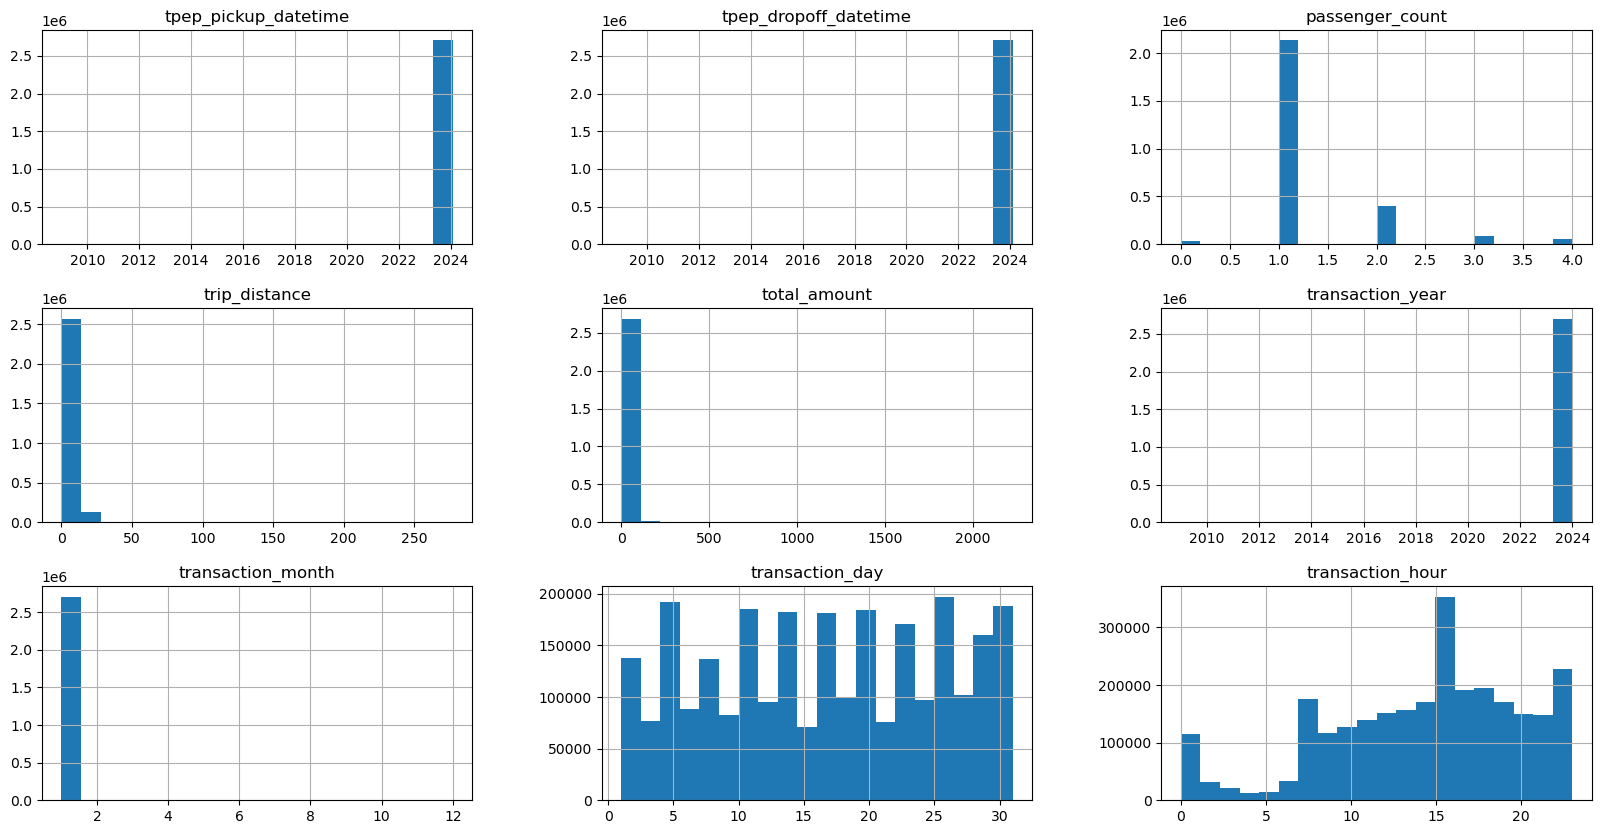

In [74]:
taxi_data_prepared.hist(figsize=(20,10), bins=20)
plt.show()

In [75]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2024]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

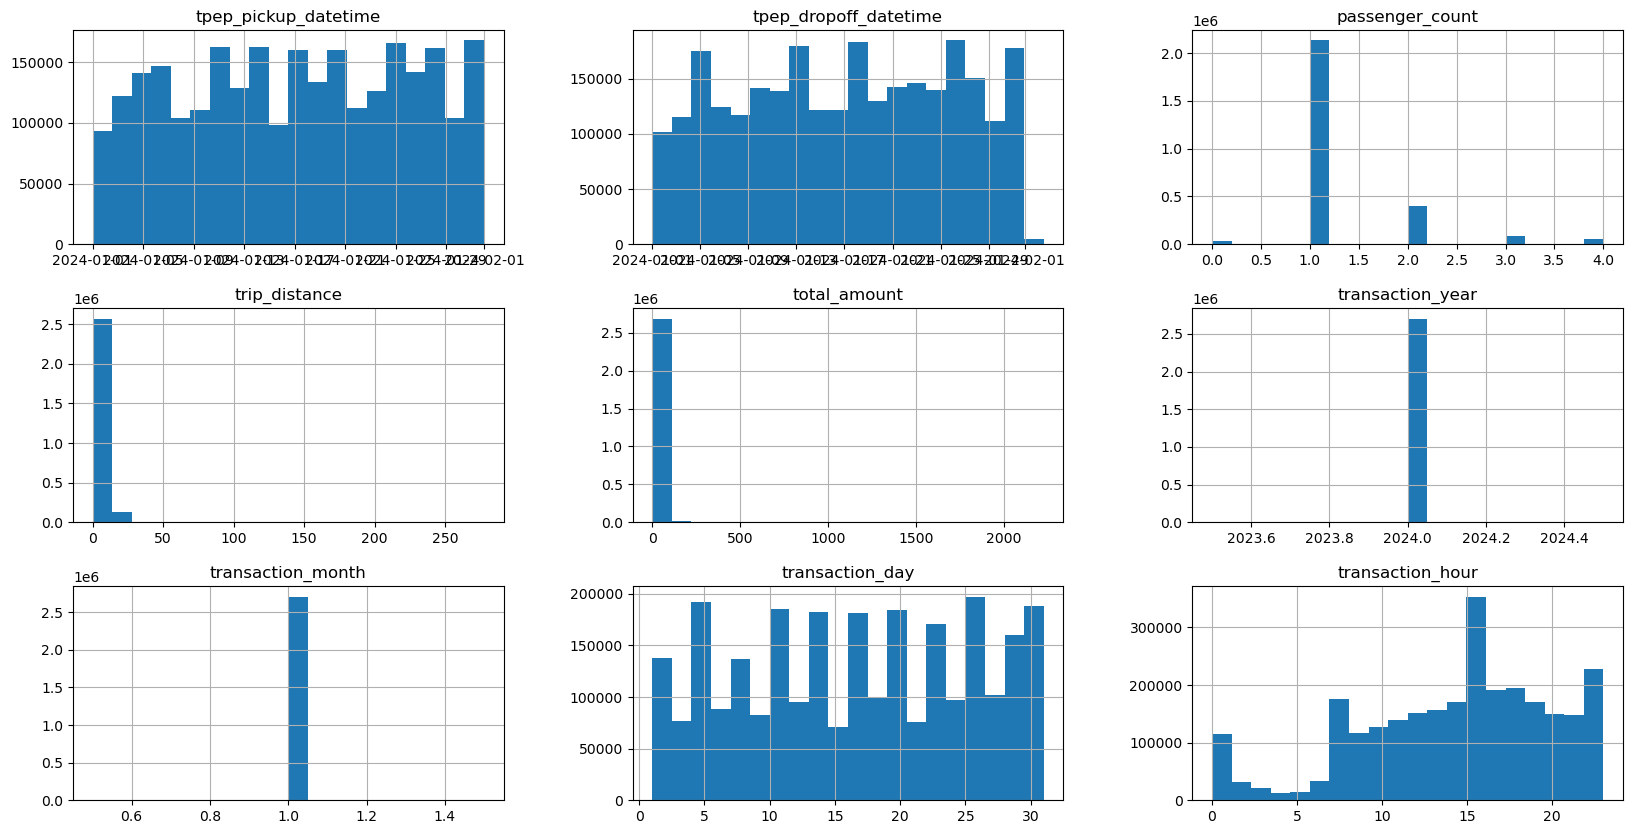

In [76]:
taxi_data_prepared.hist(figsize=(20,10), bins=20)
plt.show()

The new features created have to have their datatypes converted 

In [77]:
taxi_data_prepared.dtypes 

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int32
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
transaction_date                 object
transaction_year                  int32
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
dtype: object

In [78]:
# Convert 'transaction_date' column to datetime type
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['transaction_date'],\
                                                        errors='coerce')

In [79]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int32
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
transaction_date         datetime64[ns]
transaction_year                  int32
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
dtype: object

#### Predict how much money or the average money people spent for a cab ride 
#### in New York (a certain region)  in a given hour of a day of a month 

In [80]:
taxi_data_prepared.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'total_amount', 'transaction_date', 'transaction_year',
       'transaction_month', 'transaction_day', 'transaction_hour'],
      dtype='object')

In [81]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month',\
                      'transaction_hour', 'transaction_day']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns 

In [82]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2704505, 7)


,PULocationID,transaction_date,transaction_month,transaction_hour,transaction_day,trip_distance,total_amount
0,186,2024-01-01,1,0,1,1.72,22.70
1,140,2024-01-01,1,0,1,1.80,18.75
2,236,2024-01-01,1,0,1,4.70,31.30
3,79,2024-01-01,1,0,1,1.40,17.00
4,211,2024-01-01,1,0,1,0.80,16.10


Aggregate data points <br> 
Now is a good time to think about what we want to predict. Depending on this, we need to transform our data to have a certain format.

In [85]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index() 
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby\
(categorical_columns).count().reset_index()['total_amount']
#taxi_grouped_by_region['total_amount'] = taxi_grouped_by_region['total_amount'].round(2)
#taxi_grouped_by_region['trip_distance'] = taxi_grouped_by_region['trip_distance'].round(2)
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(58873, 8)


,PULocationID,transaction_date,transaction_month,transaction_hour,transaction_day,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,5,1,0.000000,109.200000,1
1,1,2024-01-01,1,6,1,0.020000,76.000000,3
2,1,2024-01-01,1,13,1,0.000000,108.983333,3
3,1,2024-01-01,1,14,1,0.001667,85.680000,6
4,1,2024-01-01,1,15,1,0.000000,145.620000,2


In [86]:
taxi_grouped_by_region.dtypes

PULocationID                     object
transaction_date         datetime64[ns]
transaction_month                 int32
transaction_hour                  int32
transaction_day                   int32
trip_distance                   float64
total_amount                    float64
count_of_transactions             int64
dtype: object

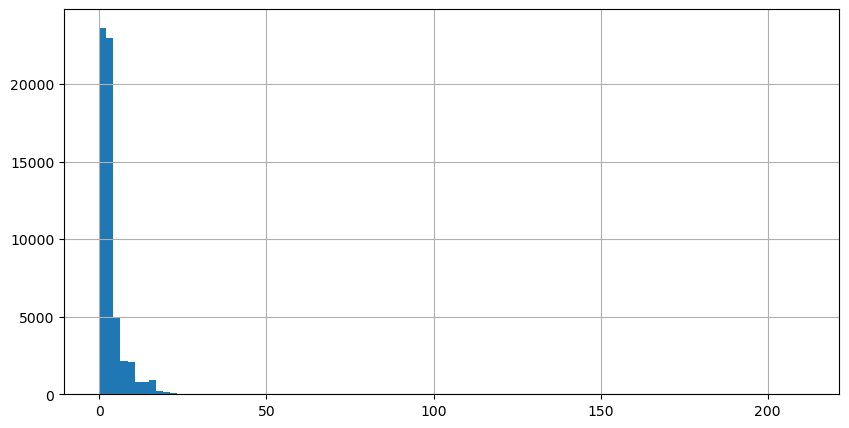

In [88]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))
plt.show()

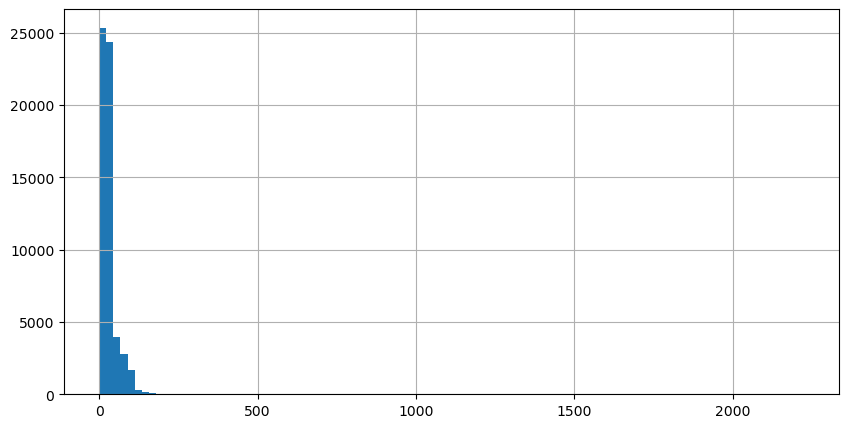

In [89]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))
plt.show()


# 5. Benchmark Model  
<a id="benchmark_model"></a>
<br>
[Back to the Top](#table-of-contents)

A benchmark that you try you use to pass your model (baseline) 

In [90]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [93]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', \
                                 'transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'


# 5.1. Train-test split 
<a id="train_test_split"></a>
<br>
[Back to the Top](#table-of-contents)

In [94]:
from sklearn.model_selection import train_test_split 

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

#one-hot encode 
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33,\
                                                       random_state=42)

One-hot encoding - converts all the categorical values to numerical values which the <br> 
code can work with


# 5.2. Fit a model to the data
<a id="fit_model"></a>
<br>
[Back to the Top](#table-of-contents)

In [95]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)